# Group/aggregate taxi and rideshare data by date
# Merge taxi and rideshare data using date as the key
# Plot daily aggregated fields with significant timline events

In [112]:
import pandas as pd
import numpy as np
import math
import os
import glob
import random
import datetime
import shapefile
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import mapclassify

In [3]:
#Import previously created files and reassigne datatypes
#define data types for import
nyt_dtypes = {'VendorID':float,'passenger_count':float,'trip_distance':float,'PULocationID':int,'DOLocationID':int,'fare_amount':float,\
          'extra':float,'mta_tax':float,'tip_amount':float,'tolls_amount':float,'improvement_surcharge':float,'total_amount':float,\
          'congestion_surcharge':float,'year':int,'month':int,'day':int,'hour':int,'date':object,'PUBorough':object,'PUZone':object,\
          'PUservice_zone':object,'DOBorough':object,'DOZone':object,'DOservice_zone':object,'RateName':object,'PaymentName':object,\
          'covid':bool,'from:to':object,'tax_amount':float}

nyt_processed = r'C:\Users\stevedc\Documents\DataMining\Output Files\nytAll_1pcnt.csv'
df_nyt = pd.read_csv(nyt_processed, delimiter=',', dtype=nyt_dtypes)

#convert dates back to date format
df_nyt['tpep_pickup_datetime'] = pd.to_datetime(df_nyt['tpep_pickup_datetime'])
df_nyt['tpep_dropoff_datetime'] = pd.to_datetime(df_nyt['tpep_dropoff_datetime'])
df_nyt['date'] = pd.to_datetime(df_nyt['date'])

#define data types for import
rs_dtypes = {'hvfhs_license_num':object,'dispatching_base_num':object,'PULocationID':int,'DOLocationID':int,'SR_Flag':float,'year':int,\
             'month':int,'day':int,'date':object,'PUBorough':object,'PUZone':object,'PUservice_zone':object,'DOBorough':object,\
             'DOZone':object,'DOservice_zone':object,'covid':bool}

rs_processed = r'C:\Users\stevedc\Documents\DataMining\Output Files\hv_combined_sampled_1pcnt.csv'
df_rs = pd.read_csv(rs_processed, delimiter=',', dtype=rs_dtypes)

df_rs['pickup_datetime'] = pd.to_datetime(df_rs['pickup_datetime'])
df_rs['dropoff_datetime'] = pd.to_datetime(df_rs['dropoff_datetime'])
df_rs['date'] = pd.to_datetime(df_rs['date'])


<ipython-input-124-53da65e2f164>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyt_sub['%Tip'] = (df_nyt_sub['tip_amount'] / df_nyt_sub['fare_amount']) * 100
<ipython-input-124-53da65e2f164>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyt_sub['%congestion_surcharge'] = (df_nyt_sub['congestion_surcharge'] / df_nyt_sub['fare_amount']) * 100


numpy.ndarray

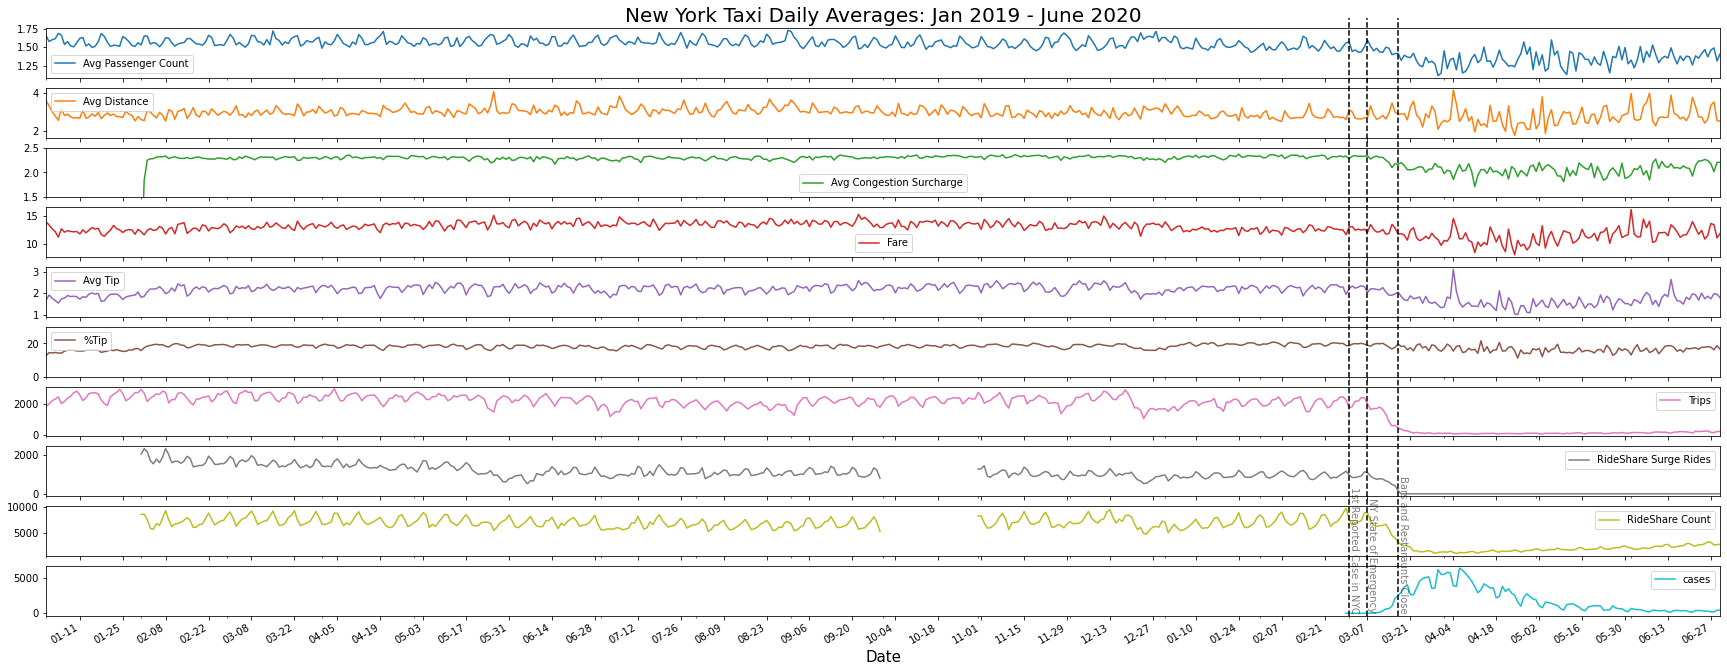

In [124]:
#Prep NYT data for groupby date
df_nyt_sub = df_nyt[['date','covid','month','passenger_count','trip_distance','fare_amount','tip_amount','congestion_surcharge','tax_amount','PULocationID']]
df_nyt_sub['%Tip'] = (df_nyt_sub['tip_amount'] / df_nyt_sub['fare_amount']) * 100
df_nyt_sub['%congestion_surcharge'] = (df_nyt_sub['congestion_surcharge'] / df_nyt_sub['fare_amount']) * 100
df_nyt_sub = df_nyt_sub[df_nyt_sub['%Tip'] <= 100]
df_nyt_sub_AMJ2019 = df_nyt_sub.loc[(df_nyt_sub['date'] >= pd.to_datetime('2019-03-01')) & (df_nyt_sub['date'] <= pd.to_datetime('2019-06-30'))]
df_nyt_sub_AMJ2020 = df_nyt_sub.loc[(df_nyt_sub['date'] >= pd.to_datetime('2020-03-01')) & (df_nyt_sub['date'] <= pd.to_datetime('2020-06-30'))]

#Prep RS data for groupby date
df_rs_sub = df_rs[['date','covid','month','SR_Flag','PULocationID']]
df_rs_sub_AMJ2019 = df_rs_sub.loc[(df_rs_sub['date'] >= pd.to_datetime('2019-03-01')) & (df_rs_sub['date'] <= pd.to_datetime('2019-06-30'))]
df_rs_sub_AMJ2020 = df_rs_sub.loc[(df_rs_sub['date'] >= pd.to_datetime('2020-03-01')) & (df_rs_sub['date'] <= pd.to_datetime('2020-06-30'))]

#Group nyt and rideshare data by date
df_nyt_byDate = df_nyt_sub.groupby('date').agg({'passenger_count':'mean','trip_distance':'mean','congestion_surcharge':'mean','fare_amount':'mean','tip_amount':'mean','%Tip':'mean','PULocationID':'count'}).rename(columns={'date':'Pickup Date', 'passenger_count':'Avg Passenger Count','trip_distance':'Avg Distance','congestion_surcharge':'Avg Congestion Surcharge','fare_amount':'Fare','tip_amount':'Avg Tip','PULocationID':'Trips'}) 
df_nyt_sub_AMJ2019_byDate = df_nyt_sub_AMJ2019.groupby('date').agg({'passenger_count':'mean','trip_distance':'mean','congestion_surcharge':'mean','fare_amount':'mean','tip_amount':'mean','%Tip':'mean','PULocationID':'count'}).rename(columns={'date':'Pickup Date', 'passenger_count':'Avg Passenger Count','trip_distance':'Avg Distance','congestion_surcharge':'Avg Congestion Surcharge','fare_amount':'Fare','tip_amount':'Avg Tip','PULocationID':'Trips'}) 
df_nyt_sub_AMJ2020_byDate = df_nyt_sub_AMJ2020.groupby('date').agg({'passenger_count':'mean','trip_distance':'mean','congestion_surcharge':'mean','fare_amount':'mean','tip_amount':'mean','%Tip':'mean','PULocationID':'count'}).rename(columns={'date':'Pickup Date', 'passenger_count':'Avg Passenger Count','trip_distance':'Avg Distance','congestion_surcharge':'Avg Congestion Surcharge','fare_amount':'Fare','tip_amount':'Avg Tip','PULocationID':'Trips'}) 

df_rs_byDate = df_rs_sub.groupby('date').agg({'SR_Flag':'sum', 'PULocationID':'count'}).rename(columns={'SR_Flag':'RideShare Surge Rides','PULocationID':'RideShare Count'})
df_rs_sub_AMJ2019_byDate = df_rs_sub_AMJ2019.groupby('date').agg({'SR_Flag':'sum', 'PULocationID':'count'}).rename(columns={'SR_Flag':'RideShare Surge Rides','PULocationID':'RideShare Count'})
df_rs_sub_AMJ2020_byDate = df_rs_sub_AMJ2020.groupby('date').agg({'SR_Flag':'sum', 'PULocationID':'count'}).rename(columns={'SR_Flag':'RideShare Surge Rides','PULocationID':'RideShare Count'})

################################
#import daily covid case data
cvFile = r'C:\Users\stevedc\Documents\DataMining\data-by-day.csv'
cols = ['date_of_interest', 'CASE_COUNT']
df_daily_covid_cases = pd.read_csv(cvFile, delimiter=',', usecols=cols)
df_daily_covid_cases.columns = ['date', 'cases']
df_daily_covid_cases['date'] = pd.to_datetime(df_daily_covid_cases['date'])
#print(display(df_daily_covid_cases))
################################

#merge nyt and rideshare by date
df_all_byDate = pd.merge(df_nyt_byDate, df_rs_byDate, on='date', how='outer')
df_all_byDate_cases = pd.merge(df_all_byDate, df_daily_covid_cases, on='date', how='left')
df_all_byDate_cases.set_index('date', inplace=True)
df_all_AMJ2019_byDate = pd.merge(df_nyt_sub_AMJ2019_byDate, df_rs_sub_AMJ2019_byDate, on='date', how='outer')
df_all_AMJ2019_byDate_cases = pd.merge(df_all_AMJ2019_byDate, df_daily_covid_cases, on='date', how='left')
df_all_AMJ2019_byDate_cases.set_index('date', inplace=True)
df_all_AMJ2020_byDate = pd.merge(df_nyt_sub_AMJ2020_byDate, df_rs_sub_AMJ2020_byDate, on='date', how='outer')
df_all_AMJ2020_byDate_cases = pd.merge(df_all_AMJ2020_byDate, df_daily_covid_cases, on='date', how='left')
df_all_AMJ2020_byDate_cases.set_index('date', inplace=True)
#print(display(df_all_byDate_cases))
#print(df_all_byDate.dtypes)

# add useful timeline events with vertical line markers
axes = df_all_byDate_cases.plot.line(subplots=True, figsize=(30,12))
axes[0].set_title('New York Taxi Daily Averages: Jan 2019 - June 2020', fontsize=20)
axes[2].set_ylim([1.5, 2.5])
axes[5].set_ylim([0, 30])
xposition = [pd.to_datetime('2020-03-1'), pd.to_datetime('2020-03-07'), pd.to_datetime('2020-03-17')]
xlabels = ['1st Reported Case in NYC', 'NY State of Emergency', 'Bars and Restaraunts Close']
for xc, ls, in zip(xposition, xlabels):
    plt.axvline(x=xc, ymin=0, ymax=12, color='k', linestyle='--', clip_on=False)
    plt.text(xc, 0, ls, rotation=-90, horizontalalignment='left', verticalalignment='bottom', multialignment='left', alpha=0.5)
#plt.axvline(x=pd.to_datetime('2020-03-01'))

date_form = DateFormatter("%m-%d")
axes[9].xaxis.set_major_formatter(date_form)
axes[9].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.xlabel('Date', fontsize=15)
type(axes)


In [135]:
print("GroupbyDate RowCount = ", len(df_nyt_byDate))

GroupbyDate RowCount =  547


numpy.ndarray

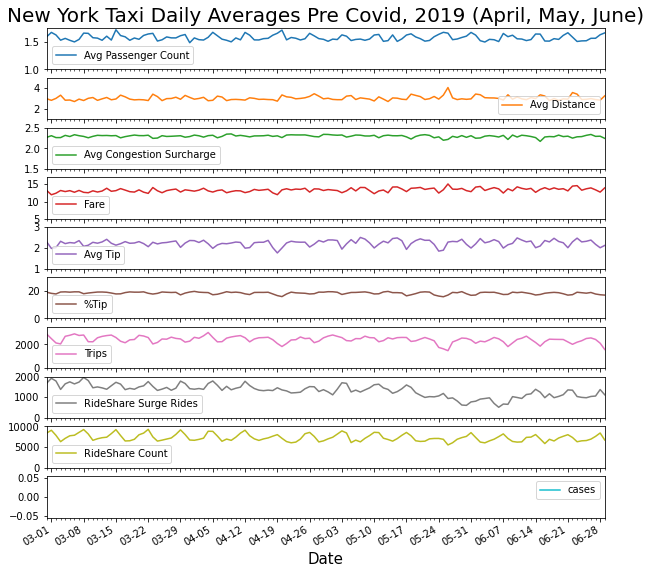

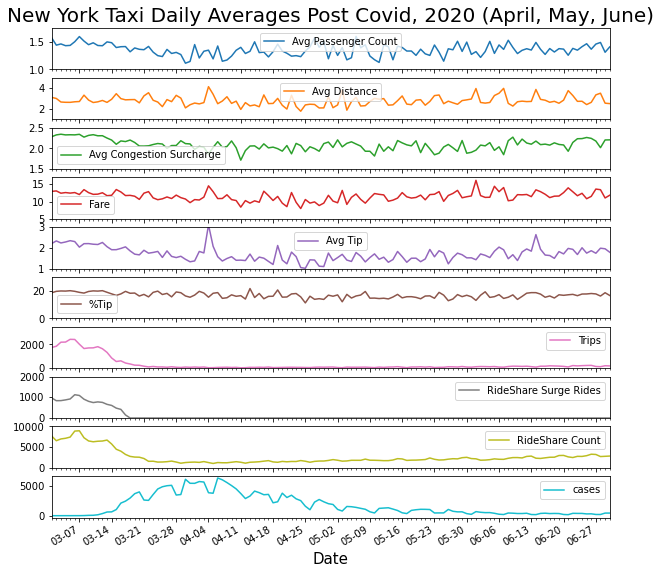

In [134]:

#lines = df_nyt_plot.plot.line()
axes_AMJ2019 = df_all_AMJ2019_byDate_cases.plot.line(subplots=True, figsize=(10,10))
axes_AMJ2019[0].set_title('New York Taxi Daily Averages Pre Covid, 2019 (April, May, June)', fontsize=20)
axes_AMJ2019[0].set_ylim([1, 1.75])
axes_AMJ2019[1].set_ylim([1, 5])
axes_AMJ2019[2].set_ylim([1.5, 2.5])
axes_AMJ2019[3].set_ylim([5, 17])
axes_AMJ2019[4].set_ylim([1, 3])
axes_AMJ2019[5].set_ylim([0, 30])
axes_AMJ2019[6].set_ylim([0, 3500])
axes_AMJ2019[7].set_ylim([0, 2000])
axes_AMJ2019[8].set_ylim([0, 10000])
axes_AMJ2019[9].xaxis.set_major_formatter(date_form)
axes_AMJ2019[9].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
axes_AMJ2019[9].xaxis.set_minor_locator(mdates.DayLocator(interval=1))
plt.xlabel('Date', fontsize=15)
type(axes_AMJ2019)

axes_AMJ2020 = df_all_AMJ2020_byDate_cases.plot.line(subplots=True, figsize=(10,10))
axes_AMJ2020[0].set_title('New York Taxi Daily Averages Post Covid, 2020 (April, May, June)', fontsize=20)
axes_AMJ2020[0].set_ylim([1, 1.75])
axes_AMJ2020[1].set_ylim([1, 5])
axes_AMJ2020[2].set_ylim([1.5, 2.5])
axes_AMJ2020[3].set_ylim([5, 17])
axes_AMJ2020[4].set_ylim([1, 3])
axes_AMJ2020[5].set_ylim([0, 30])
axes_AMJ2020[6].set_ylim([0, 3500])
axes_AMJ2020[7].set_ylim([0, 2000])
axes_AMJ2020[8].set_ylim([0, 10000])
axes_AMJ2020[9].xaxis.set_major_formatter(date_form)
axes_AMJ2020[9].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
axes_AMJ2020[9].xaxis.set_minor_locator(mdates.DayLocator(interval=1))
plt.xlabel('Date', fontsize=15)
type(axes_AMJ2020)